In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

In [2]:
# 캘리포니아 주택 가격 데이터셋 로드
housing = fetch_california_housing()

# 데이터프레임 생성
df_housing = pd.DataFrame(housing.data, columns=housing.feature_names)
df_housing['Target'] = housing.target # 목표변수 추가

# 데이터프레임의 첫 5행 출력
print(df_housing.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [3]:
df_housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


 ### Base 데이터셋 이상치 확인하기

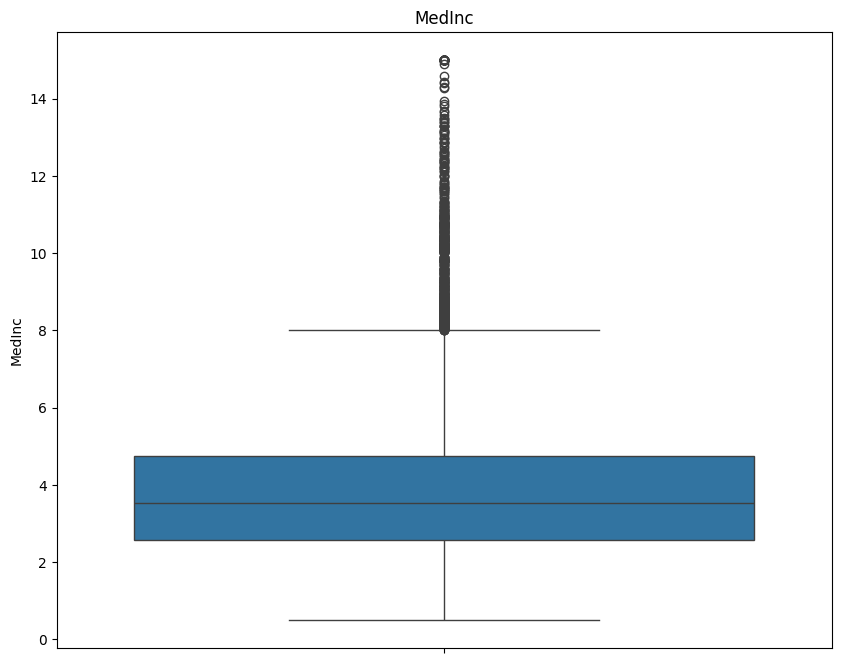

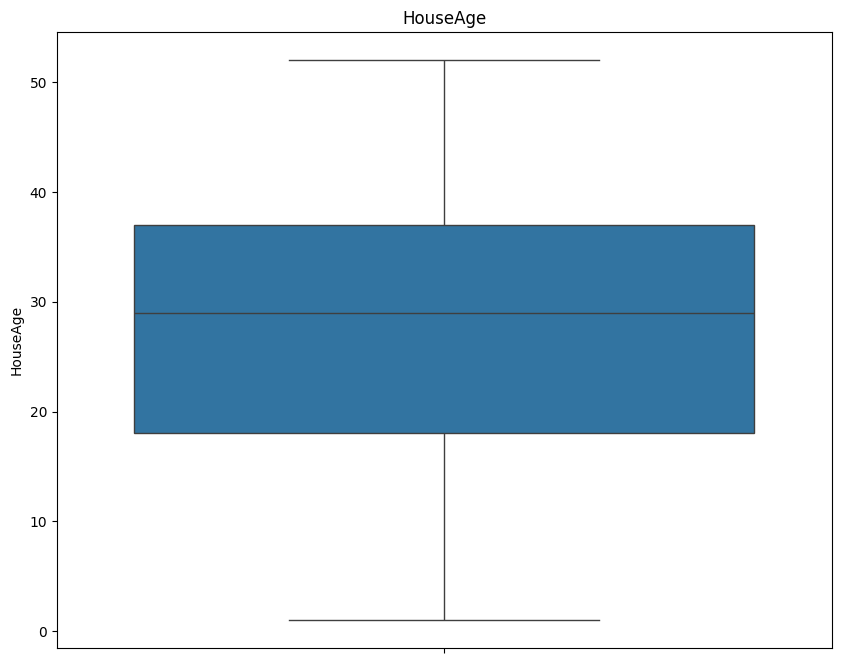

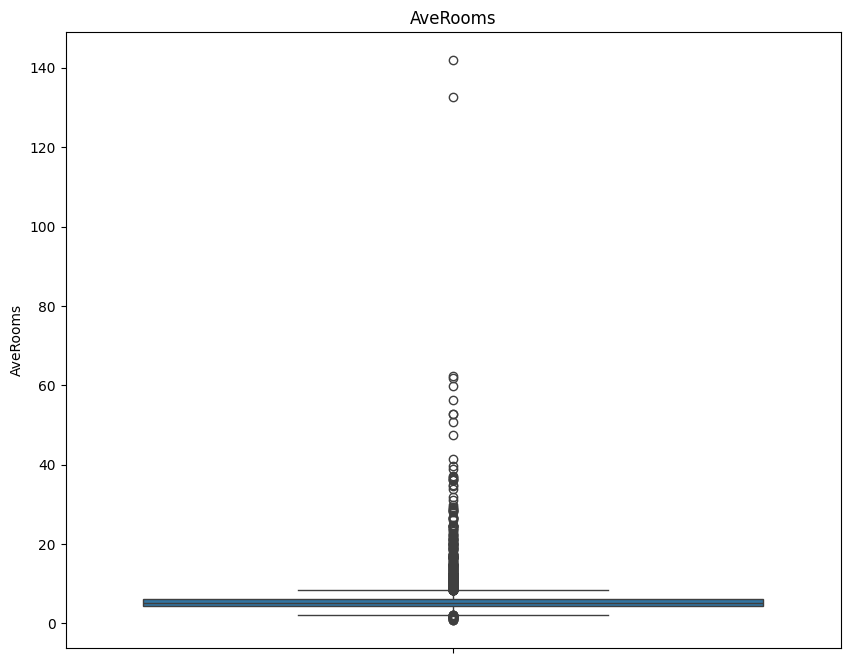

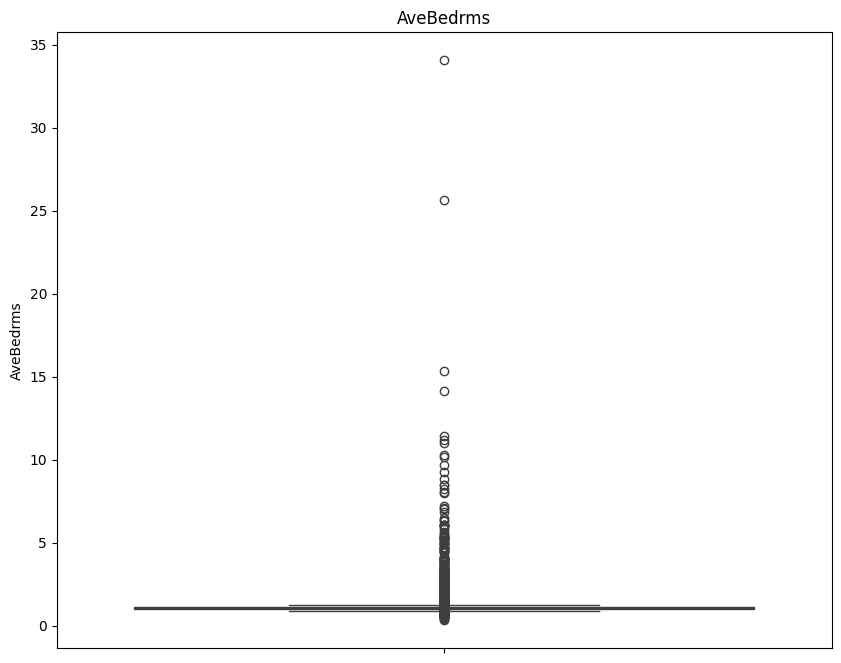

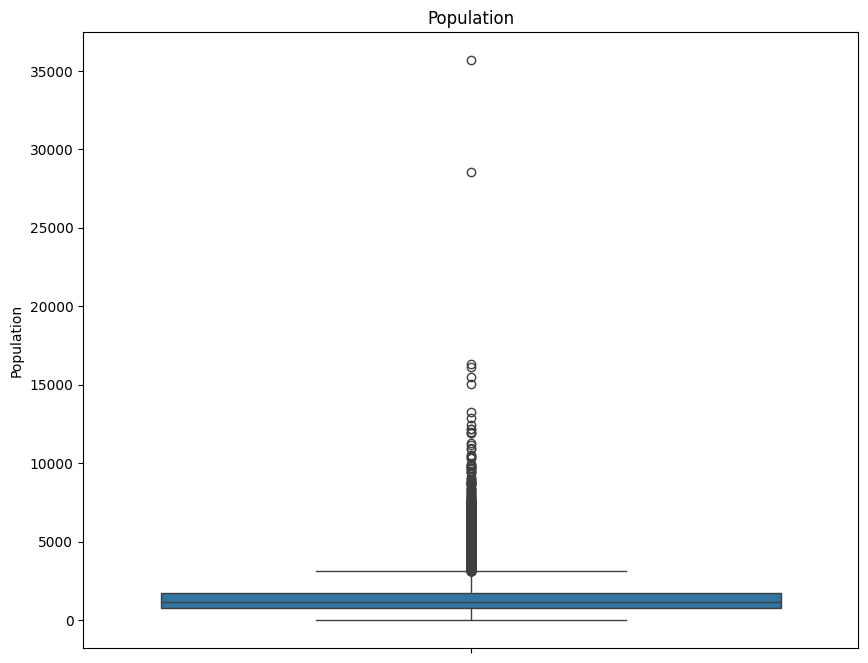

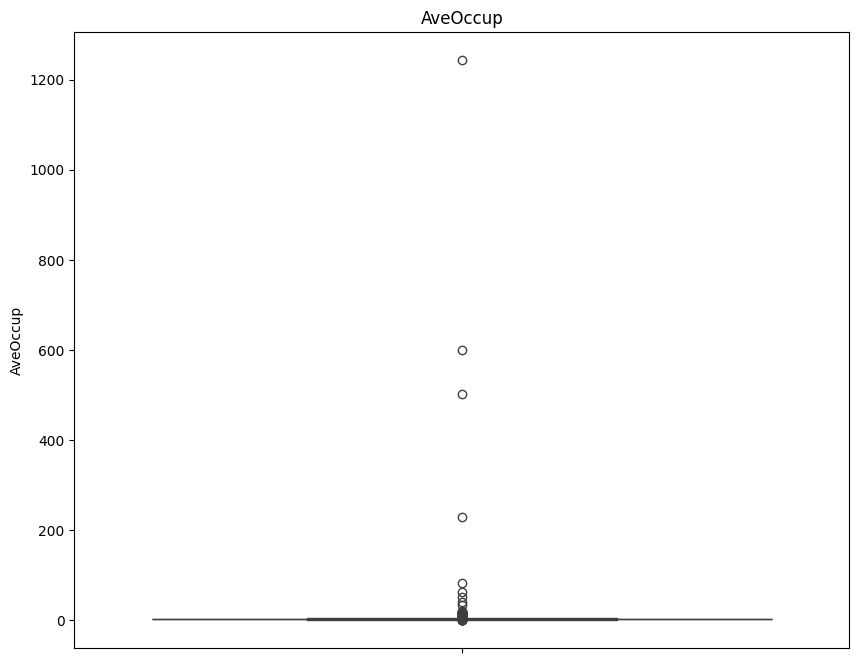

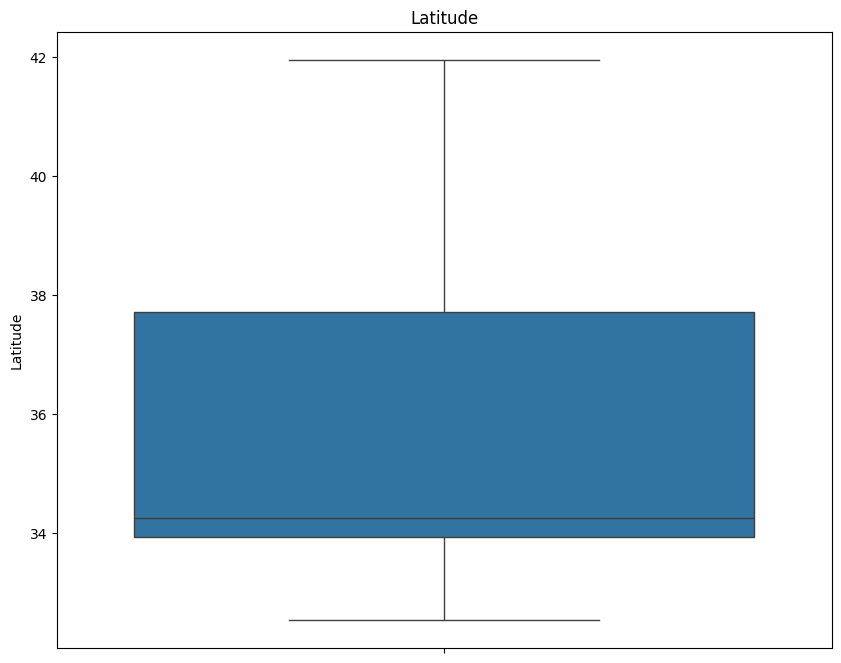

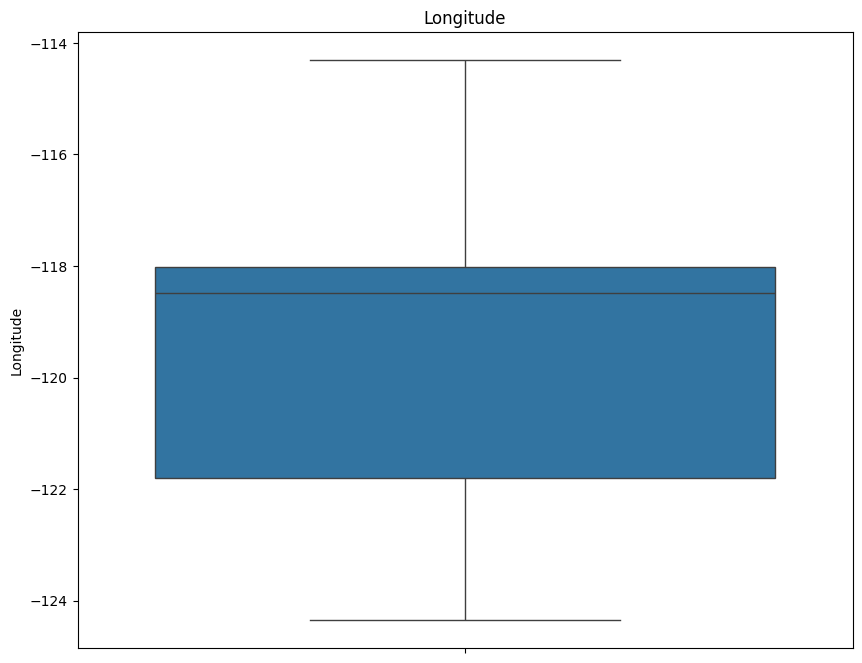

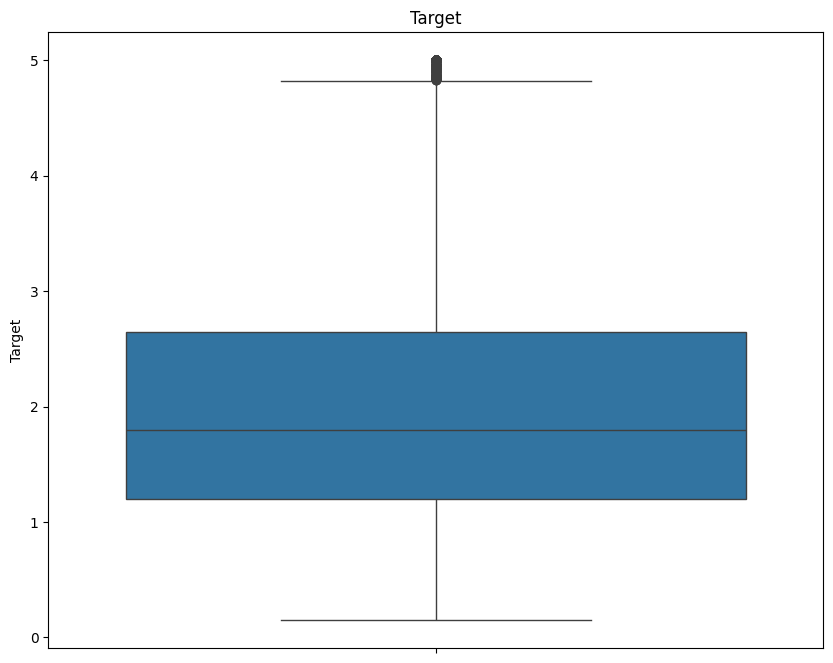

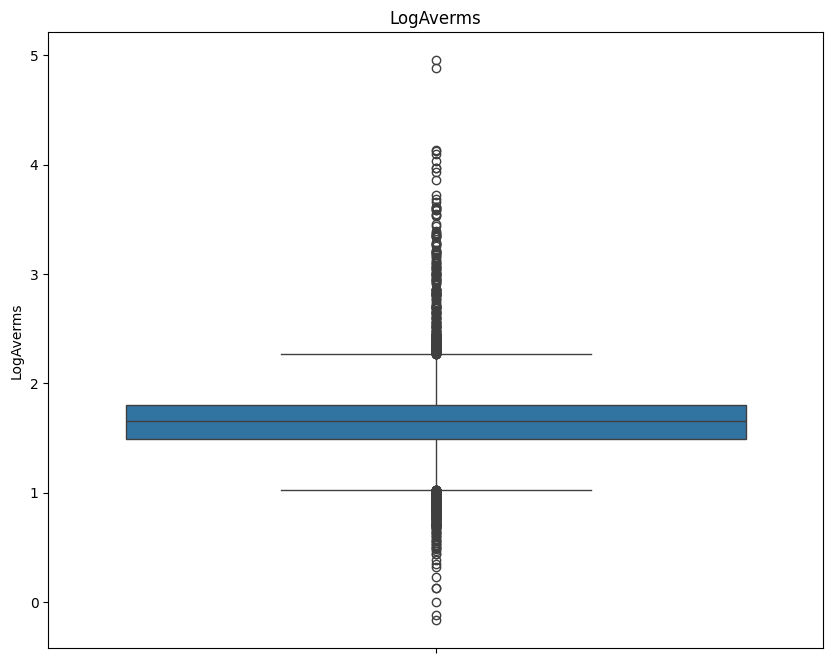

In [36]:
# boxplot으로 이상치 탐지

for col in df_housing.columns:
    plt.figure(figsize=(10, 8))
    sns.boxplot(df_housing[col])
    plt.title(col)
    plt.show()

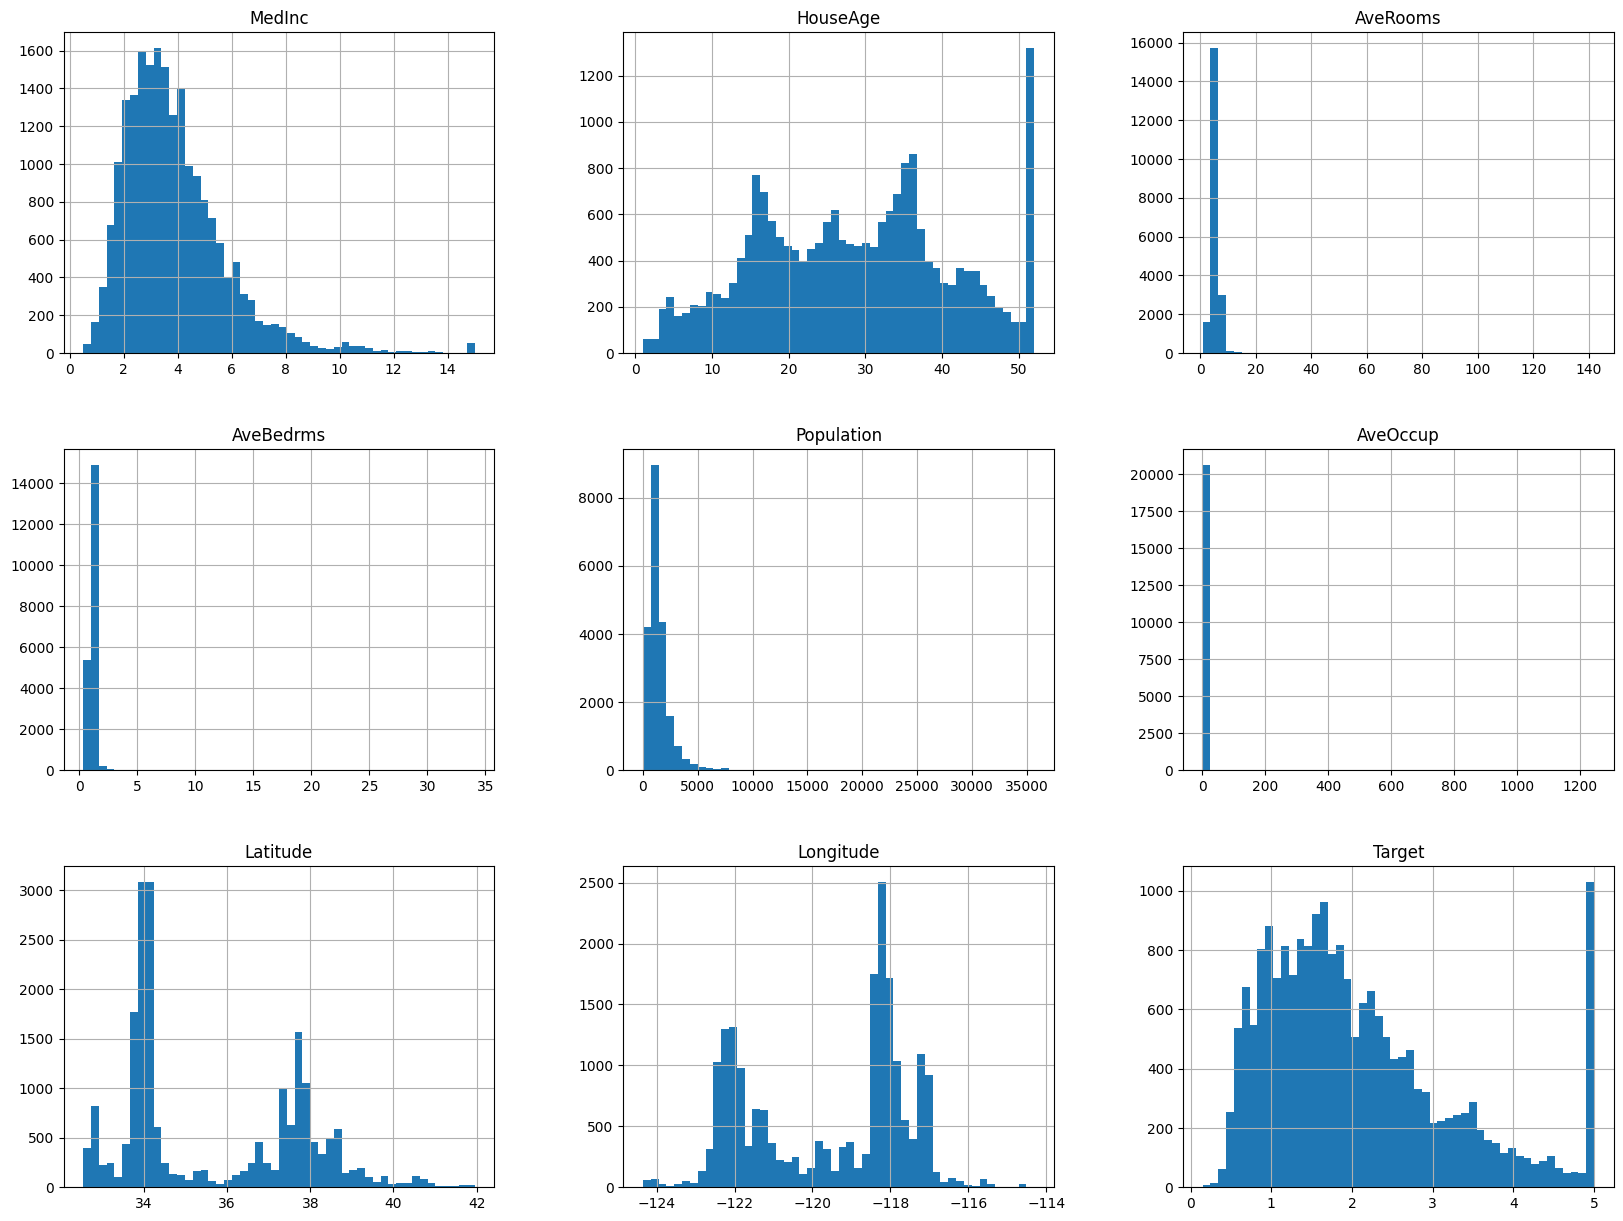

In [5]:
# 데이터 프레임 히스토그램 확인
df_housing.hist(bins=50, figsize=(20,15))
plt.show()

-> 여러 변수들 중 이상치의 영향이 클 것으로 예상되는 AveRooms와 Target과의 선형회귀분석을 실시하도록 하겠다

In [6]:
df = df_housing[['AveRooms', 'Target']]

<ipython-input-7-ad326ce3b8ea>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AveRooms'])


<Axes: xlabel='AveRooms', ylabel='Density'>

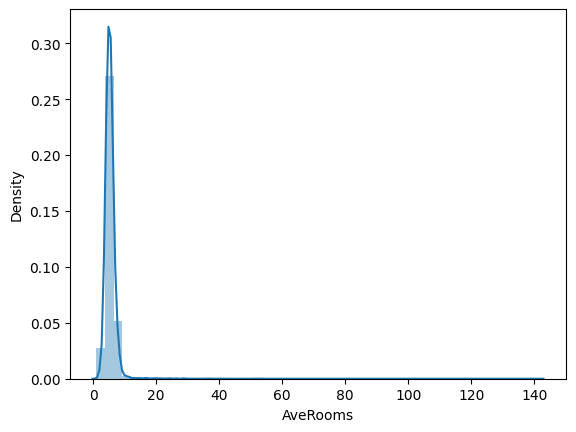

In [7]:
# 독립변수 분포 확인
sns.distplot(df['AveRooms'])

<ipython-input-8-65b399d1da1a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Target'])


<Axes: xlabel='Target', ylabel='Density'>

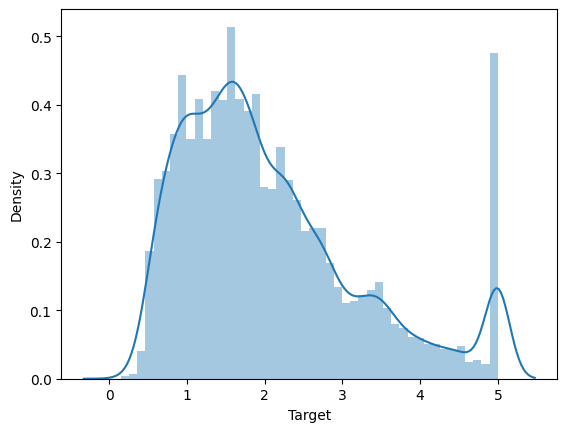

In [8]:
# 종속변수 분포 확인
sns.distplot(df['Target'])

### 이상치를 제거하지 않고, 회귀분석을 진행한 경우

In [9]:
# 라이브러리 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

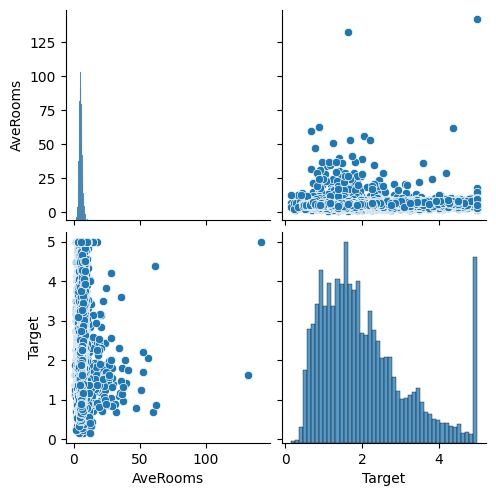

In [10]:
sns.pairplot(df)

'AveRooms'는 대부분 왼쪽으로 치우친 형태, 'Target'은 최댓값 부분이 지나치게 많음

-> 이상치 처리를 한다면 어떻게 변화할 것인가

In [11]:
# train_test 분리
x = df['AveRooms']
y = df['Target']

X_train, X_test, y_train, y_test= train_test_split(x,y,train_size=0.7, test_size=0.3)

print('train 수:',len(X_train))
print('test 수:',len(X_test))

train 수: 14447
test 수: 6192


In [12]:
# 회귀모델 불러와서 비교 분석하기
mreg1 = LinearRegression(fit_intercept=True)
mreg1.fit(np.array(X_train).reshape(-1,1), y_train)

LinearRegression()

In [13]:
# 예측값을 보고 변화를 확인할 예정
y_pred1=mreg1.predict(np.array(X_test).reshape(-1,1))
y_pred1

array([2.11225424, 2.21319669, 2.13026668, ..., 2.0999135 , 2.11948239,
       2.09999221])

In [14]:
# train, test 결정계수와 mse 출력
print('R-square train:{:.5f}'.format(mreg1.score(np.array(X_train).reshape(-1,1), y_train)))
print('R-square test:{:.5f}'.format(mreg1.score(np.array(X_test).reshape(-1,1), y_test)))
print('MSE:{:.5f}'.format(mean_squared_error(y_test, y_pred1)))

R-square train:0.02046
R-square test:0.02798
MSE:1.27702


### 이상치 1번 제거하기


In [15]:
# Q1, Q3 범위 정하기
Q1 = df['AveRooms'].quantile(0.25)
Q3 = df['AveRooms'].quantile(0.75)
IQR = Q3 - Q1 # IQR값 계산
rev_range = 1.5 # 범위조절변수

# 이상치 범위 설정
filter=(df['AveRooms']>=Q1-rev_range*IQR) & (df['AveRooms']<=Q3+rev_range*IQR)

# 데이터 프레임에 이상치 제거 필터 적용
df_rm1=df.loc[filter]

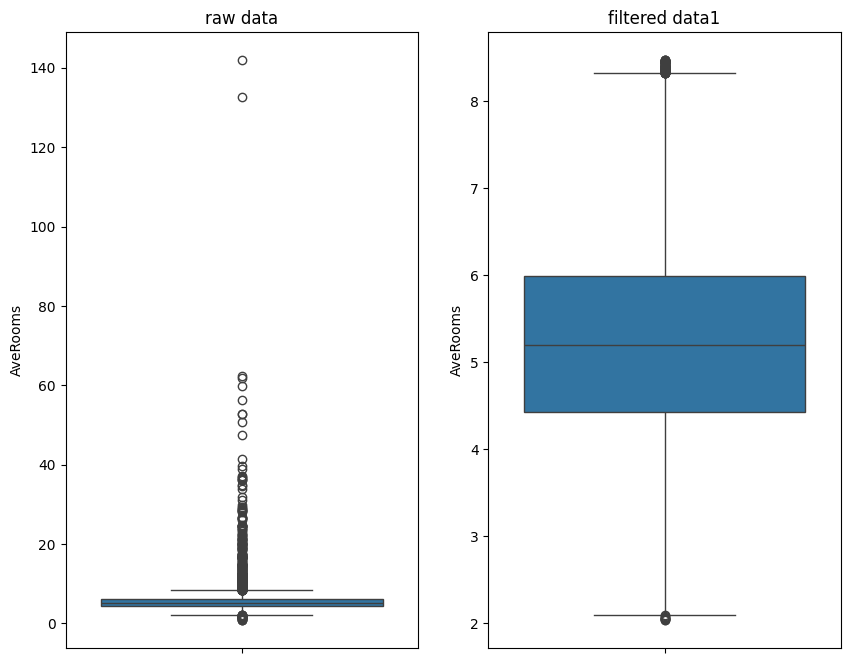

In [16]:
# raw data와 filtered data1 비교 boxplot
plt.figure(figsize=(10,8))

plt.subplot(121)
sns.boxplot(y='AveRooms',data =df)
plt.title('raw data')

plt.subplot(122)
sns.boxplot(y='AveRooms',data =df_rm1)
plt.title('filtered data1')

plt.show()

In [17]:
df_rm1.describe()

,AveRooms,Target
count,20129.000000,20129.000000
mean,5.238801,2.054875
std,1.154132,1.137022
min,2.032738,0.149990
25%,4.426656,1.194000
50%,5.197183,1.795000
75%,5.983759,2.631000
max,8.469738,5.000010


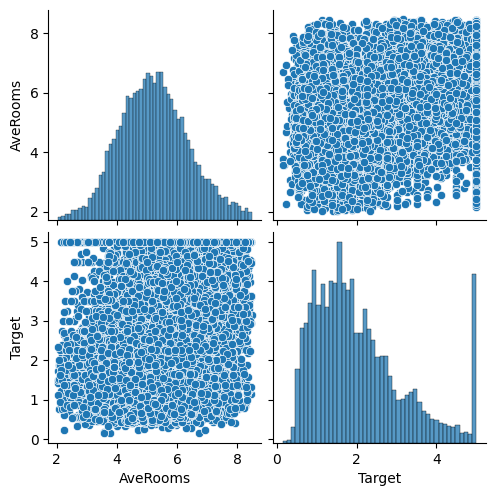

In [18]:
# 이상치 제거 후 pairpolt
sns.pairplot(df_rm1)

이상치 처리 후 값들이 고르게 분포한 것으로 보이지만, Target의 최댓값은 여전히 많이 존재하고 있다

### 다시 회귀분석 진행


In [19]:
# train_test 분리
x = df_rm1['AveRooms']
y = df_rm1['Target']

X_train, X_test, y_train, y_test= train_test_split(x,y,train_size=0.7, test_size=0.3)

print('train 수:',len(X_train))
print('test 수:',len(X_test))

train 수: 14090
test 수: 6039


In [20]:
# 회귀모델 불러와서 비교 분석하기
mreg2 = LinearRegression(fit_intercept=True)
mreg2.fit(np.array(X_train).reshape(-1,1), y_train)

LinearRegression()

In [21]:
# 예측값을 보고 변화를 확인할 예정
y_pred2=mreg2.predict(np.array(X_test).reshape(-1,1))
y_pred2

array([2.14118222, 1.7012807 , 1.41783259, ..., 1.89145594, 2.28764753,
       1.98548506])

In [22]:
# train, test 결정계수와 mse 출력
print('R-square train:{:.5f}'.format(mreg2.score(np.array(X_train).reshape(-1,1), y_train)))
print('R-square test:{:.5f}'.format(mreg2.score(np.array(X_test).reshape(-1,1), y_test)))
print('MSE:{:.5f}'.format(mean_squared_error(y_test, y_pred2)))

R-square train:0.10194
R-square test:0.09539
MSE:1.17353


### 이상치 2번 제거하기


In [23]:
# Q1, Q3 범위 정하기
Q1 = df_rm1['AveRooms'].quantile(0.25)
Q3 = df_rm1['AveRooms'].quantile(0.75)
IQR = Q3 - Q1 # IQR값 계산
rev_range = 1.5 # 범위조절변수

# 이상치 범위 설정
filter=(df_rm1['AveRooms']>=Q1-rev_range*IQR) & (df_rm1['AveRooms']<=Q3+rev_range*IQR)

# 데이터 프레임에 이상치 제거 필터 적용
df_rm2=df_rm1.loc[filter]

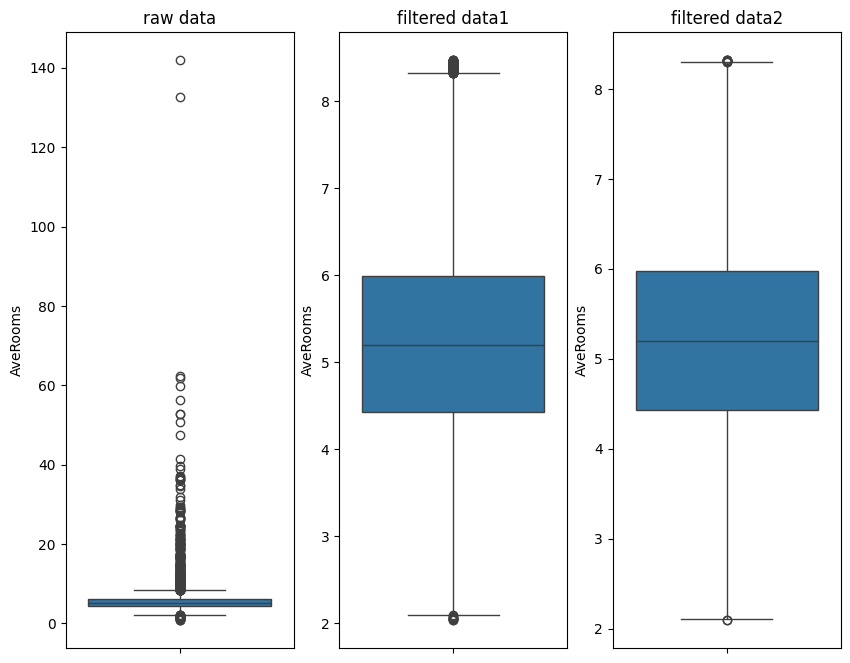

In [24]:
# raw data와 filtered data1, filtered data2 비교 boxplot
plt.figure(figsize=(10,8))

plt.subplot(131)
sns.boxplot(y='AveRooms',data =df)
plt.title('raw data')

plt.subplot(132)
sns.boxplot(y='AveRooms',data =df_rm1)
plt.title('filtered data1')

plt.subplot(133)
sns.boxplot(y='AveRooms',data =df_rm2)
plt.title('filtered data2')

plt.show()

* 회귀분석


In [25]:
# train_test 분리
x = df_rm2['AveRooms']
y = df_rm2['Target']

X_train, X_test, y_train, y_test= train_test_split(x,y,train_size=0.7, test_size=0.3)

print('train 수:',len(X_train))
print('test 수:',len(X_test))

train 수: 14037
test 수: 6016


In [26]:
# 회귀모델 불러와서 비교 분석하기
mreg3 = LinearRegression(fit_intercept=True)
mreg3.fit(np.array(X_train).reshape(-1,1), y_train)

LinearRegression()

In [27]:
# 예측값을 보고 변화를 확인할 예정
y_pred3=mreg3.predict(np.array(X_test).reshape(-1,1))
y_pred3

array([2.47717369, 2.26306541, 2.26912654, ..., 2.12961263, 2.10561562,
       2.03442983])

In [28]:
# train, test 결정계수와 mse 출력
print('R-square train:{:.5f}'.format(mreg3.score(np.array(X_train).reshape(-1,1), y_train)))
print('R-square test:{:.5f}'.format(mreg3.score(np.array(X_test).reshape(-1,1), y_test)))
print('MSE:{:.5f}'.format(mean_squared_error(y_test, y_pred3)))

R-square train:0.09131
R-square test:0.10085
MSE:1.15293


### 성능비교


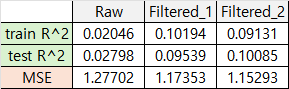

 이상치를 제거할수록 영향이 줄어드니까 성능이 좋아지고, 예측오차가 줄어드는 경향이 일반적이라고 알려져 있다.

  이번 캘리포니아 주택 가격 데이터셋에서도 raw data에서 filtered_data1으로 바뀔 때 즉, 이상치를 한 번 제거했을 때 train, test 결정계수는 확연하게 높아지고 MSE는 줄어들어 전반적으로 모델 성능이 좋아졌다고 해석할 수 있다. 한 번 더 이상치를 제거했을 때는 test 결정계수가 높아지고 MSE는 낮아졌지만, train 결정계수가 살짝 낮아지는 결과가 나타났다.

   이는 이상치를 2번 제거하는 과정에서 필요 이상으로 데이터가 손실되어서 모델의 설명력이 감소했다고 볼 수 있다. 또한, 영향력이 있는 이상치를 제거해서 이러한 결과가 나타났을 수도 있다고 생각했다.

   그렇다면 이상치를 제거하지 않고 파생변수를 하나 만들어서 성능이 좋아지는지 확인해 보려고 한다.

### 파생변수

In [29]:
# 로그변환 파생변수 생성
df_housing['LogAverms'] = np.log(df_housing['AveRooms'])

<ipython-input-30-72a64599dc45>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_housing['AveRooms'])
<ipython-input-30-72a64599dc45>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_housing['LogAverms'])


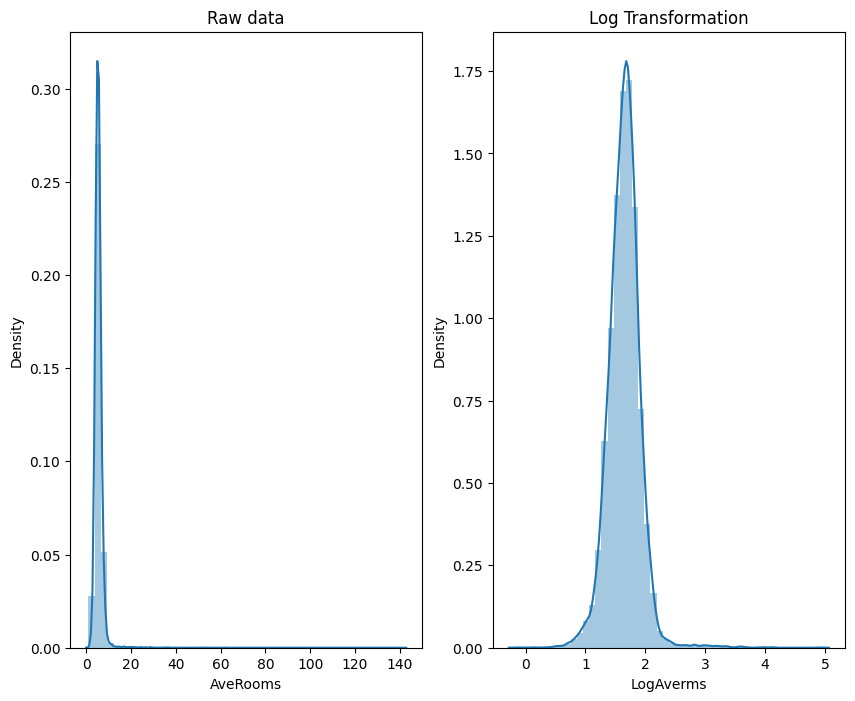

In [30]:
# 로그변환 전후 AveRooms 데이터 분포 비교
plt.figure(figsize=(10,8))
plt.subplot(121)
sns.distplot(df_housing['AveRooms'])
plt.title('Raw data')

plt.subplot(122)
sns.distplot(df_housing['LogAverms'])
plt.title('Log Transformation')
plt.show()

* 확실히 로그 변환 후 정규분포의 양상처럼 바뀐 것을 확인할 수 있다

In [31]:
# train_test 분리
x = df_housing['LogAverms']
y = df_housing['Target']

X_train, X_test, y_train, y_test= train_test_split(x,y,train_size=0.7, test_size=0.3)

print('train 수:',len(X_train))
print('test 수:',len(X_test))

train 수: 14447
test 수: 6192


In [32]:
# 회귀모델 불러와서 비교 분석하기
mreg = LinearRegression(fit_intercept=True)
mreg.fit(np.array(X_train).reshape(-1,1), y_train)

LinearRegression()

In [33]:
# 예측값을 보고 변화를 확인할 예정
y_pred = mreg.predict(np.array(X_test).reshape(-1,1))
y_pred

array([1.85092164, 2.20341633, 1.95697823, ..., 2.07493094, 2.31042319,
       1.74367484])

**Raw data의 성능**

R-square train:0.02046

R-square test:0.02798

MSE:1.27702

In [34]:
# train, test 결정계수와 mse 출력
print('R-square train:{:.5f}'.format(mreg.score(np.array(X_train).reshape(-1,1), y_train)))
print('R-square test:{:.5f}'.format(mreg.score(np.array(X_test).reshape(-1,1), y_test)))
print('MSE:{:.5f}'.format(mean_squared_error(y_test, y_pred)))

R-square train:0.05481
R-square test:0.06433
MSE:1.25776


로그변환 파생변수 후 결정계수는 높아지고, MSE값은 낮아져 성능이 좋아졌다고 해석할 수 있다. 이는 그래프에서 확인할 수 있듯이 로그변환이 데이터의 분포를 정규화해주고, 이상치의 영향을 줄여주는 효과가 있음을 알 수 있다.

 결론적으로 본 과제를 요약하자면,,,

  IQR 이상치 처리 방법으로 모델의 성능을 향상시킬 수는 있지만 이상치를 제거하지 않고도 파생변수를 생성하거나 혹은 다른 방법으로 성능을 향상시킬 수 있다 !
  